# Let's flow some tensors

## A simple hello tensors !

In [1]:
import tensorflow as tf # need to import the right package

In [2]:
x = tf.constant('Hello tensors!') # this is how we create tensors woith constant value

In [3]:
with tf.Session() as sess:
    x_val = sess.run(x)
    print(x_val)

Hello tensors!


## Matrix multiplication

In [4]:
M = tf.constant([[1, 2, 1],[2, 2, 2]])
V = tf.constant([[1], [1], [0]])
prod = tf.matmul(M,V)
with tf.Session() as sess:
    prod_val, M_val, V_val = sess.run([prod, M , V])
    print('product of M {} and V  {} \n is {}'.format(M_val, V_val, prod_val))

product of M [[1 2 1]
 [2 2 2]] and V  [[1]
 [1]
 [0]] 
 is [[3]
 [4]]


## Let's do some machine learning
Here we will build a simple logistic regression model to classify mnist data set

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Verify everthing looks good

In [6]:
print('{} training example with shape {}'.format(mnist.train.num_examples, mnist.train.images[0].shape))
print('{} test example with shape {}'.format(mnist.test.num_examples, mnist.test.images[0].shape))

55000 training example with shape (784,)
10000 test example with shape (784,)


In [7]:
NUM_CLASSES = 10
X_DIM = 28
Y_DIM = 28
import numpy as np
unique_label = np.unique(np.argmax(mnist.train.labels, 1))
print(unique_label)
assert NUM_CLASSES == len(unique_label), 'number of label does not match'
assert X_DIM*Y_DIM == mnist.train.images[0].size, 'total pixel does not match'

[0 1 2 3 4 5 6 7 8 9]


## Let's randomly view some of them

In [8]:
# magic command so that images are inline in notebook
%matplotlib inline 
import matplotlib.pyplot as plt # visulaization package in python

[ 2732 43567 42613 52416]


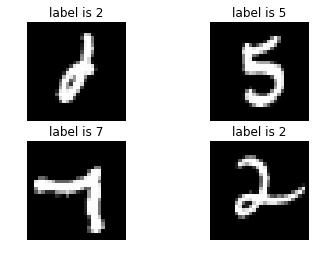

In [9]:
np.random.seed(0) # to make sure we have deterministic results on each iteration
NUM_FIG_DISP = 4
rand_ind = np.random.randint(mnist.train.num_examples, size=NUM_FIG_DISP)
print(rand_ind)
plt.figure(1)
plt.gray()
for idx, image_index in enumerate(rand_ind):
    plt.subplot(2,2,idx +1)
    plt.imshow(np.reshape(mnist.train.images[image_index], (X_DIM, Y_DIM)) )
    plt.title('label is {}'.format(np.argmax(mnist.train.labels[image_index])))  
    plt.axis('off')
plt.show()

## define model model

In [10]:
PIXELS_PER_SAMPLE = X_DIM*Y_DIM
BATCH_SIZE = 100
NUM_EPOCHS = 10
X =  tf.placeholder(tf.float32, [None, PIXELS_PER_SAMPLE])
Y = tf.placeholder(tf.float32, [None, NUM_CLASSES])
M = tf.Variable(tf.random_normal([X_DIM*Y_DIM, NUM_CLASSES]), name='weight')
b = tf.Variable(tf.zeros([NUM_CLASSES]), name='bias')
Y_pred = tf.matmul(X, M) + b
print('shape of prediction vector is {}'.format(Y_pred.get_shape().as_list()))

shape of prediction vector is [None, 10]


## Let's convert this score vector of 10 into probability vector using softmax

In [11]:
Y_pred_prob = tf.nn.softmax(Y_pred)

## build a loss/cost/objective function to measure how go we are doing

In [12]:
loss = tf.reduce_mean(-Y*tf.log(Y_pred_prob))

## build an accuracy measure

In [13]:
accuracy = tf.equal(tf.argmax(Y,1), tf.argmax(Y_pred_prob,1)) # picking the index of high probabiity
accuracy = tf.cast(accuracy, tf.float32)
accuracy = tf.reduce_mean(accuracy)

In [14]:
accuracy.get_shape()

TensorShape([])

## let create an optimizer

In [15]:
opt = tf.train.GradientDescentOptimizer(learning_rate = .5).minimize(loss)

In [16]:
print(mnist.train.images[0].dtype)
print(mnist.train.labels[0].dtype)

float32
float64


## Lets run the model and see how it performing

In [17]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for eidx in range(NUM_EPOCHS):
        for bidx in range(mnist.train.num_examples// BATCH_SIZE):
            xs, ys = mnist.train.next_batch(BATCH_SIZE)
            xs = xs.astype(np.float32)
            _, loss_val= sess.run([opt, loss], feed_dict={X:xs, Y:ys})
            if (bidx+1)%100 == 0: # print result every 100 batch
                accuracy_val = accuracy.eval(session=sess, feed_dict={X:xs, Y:ys})
                print('epoch {} batch {} loss {} accu'.format(eidx +1 , bidx +1, accuracy_val))
        print('epoch {} # test accuracy {}#'.format(eidx +1, accuracy.eval(session=sess,
            feed_dict= {X:mnist.test.images.astype(np.float32), Y: mnist.test.labels})))        
                

Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch 1 batch 100 loss 0.319999992847 accu
epoch 1 batch 200 loss 0.430000007153 accu
epoch 1 batch 300 loss 0.589999973774 accu
epoch 1 batch 400 loss 0.670000016689 accu
epoch 1 batch 500 loss 0.709999978542 accu
epoch 1 # test accuracy 0.647899985313#
epoch 2 batch 100 loss 0.730000019073 accu
epoch 2 batch 200 loss 0.660000026226 accu
epoch 2 batch 300 loss 0.740000009537 accu
epoch 2 batch 400 loss 0.689999997616 accu
epoch 2 batch 500 loss 0.75 accu
epoch 2 # test accuracy 0.747500002384#
epoch 3 batch 100 loss 0.77999997139 accu
epoch 3 batch 200 loss 0.850000023842 accu
epoch 3 batch 300 loss 0.810000002384 accu
epoch 3 batch 400 loss 0.759999990463 accu
epoch 3 batch 500 loss 0.850000023842 accu
epoch 3 # test accuracy 0.786400020123#
epoch 4 batch 100 loss 0.759999990463 accu
epoch 4 batch 200 loss 0.740000009537 accu
epoch 4 batch 300 loss 0.77999997139 accu
epoch 4 batch 400 loss 0.819999992847 accu
e